In [269]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
from matplotlib.pyplot import cm
from matplotlib.colors import ListedColormap

In [133]:
X1 = np.random.randn(40)/2
Y1 = np.random.randn(40)/2
V = np.column_stack([X1,Y1])
X2 = np.random.randn(40)/2+1
Y2 = np.random.randn(40)/2+2
W = np.column_stack([X2,Y2])
point = (np.random.randn(1),np.random.randn(1))

Text(0.5, 1.0, 'Euclidean Nearest Neightbor. K = 1')

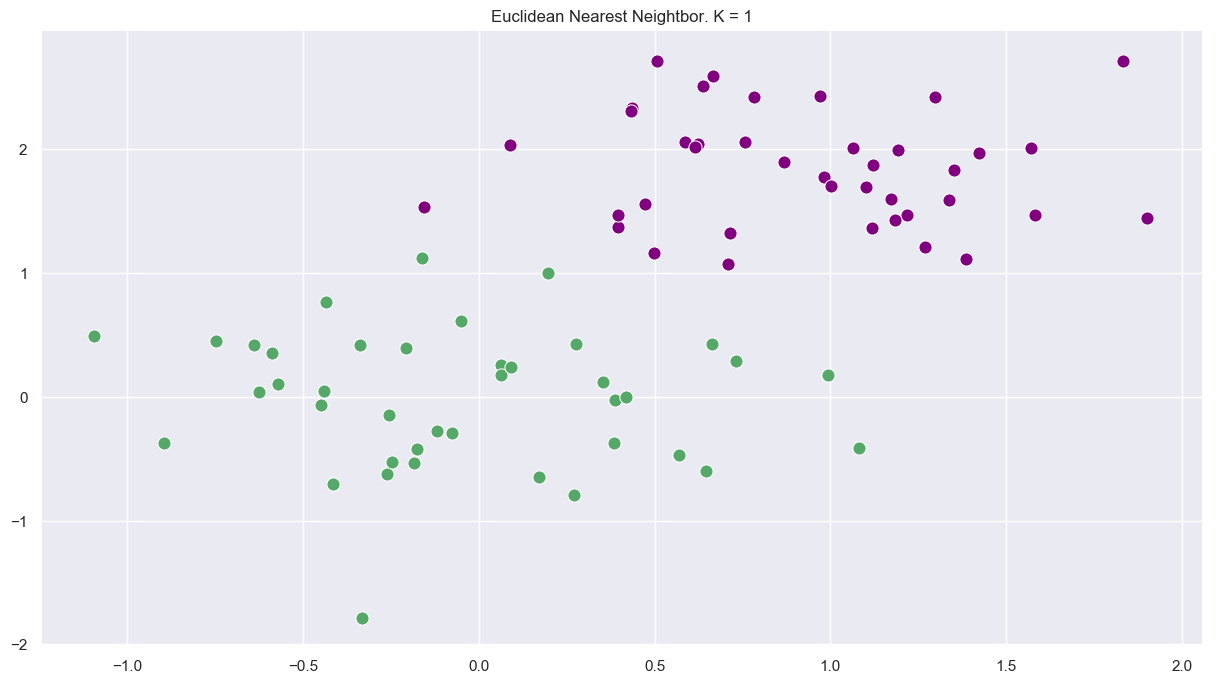

In [113]:
#jtplot.reset()
sns.set()
plt.figure(figsize = (15,8))
sns.scatterplot(x = X1, y = Y1, color = 'g', s = 90)
sns.scatterplot(x = X2,y = Y2, color = 'purple', s = 90)
#plt.plot(point[0],point[1],'ro')
#plt.imshow(X1, interpolation = 'bilinear', extent = (X1.min(),X2.max(),Y1.min(),Y2.max()),
          #aspect = 'auto', origin = 'lower')
plt.title('Euclidean Nearest Neightbor. K = 1')

In [228]:
def d(X,Y):
    colstack = np.column_stack([X.ravel(),Y.ravel()])
    Z = []
    for i in range(colstack.shape[0]):
        arr = colstack[i]
        D1 = [np.dot(arr-V[i],arr-V[i]) for i in range(len(V))]
        D2 = [np.dot(arr-W[i],arr-W[i]) for i in range(len(W))]
        d1 = min(D1)
        d2 = min(D2)
        if d1 > d2:
            z = 1
        elif d1<=d2:
            z = 0
        Z.append(z)
    Z = np.array(Z).reshape(X.shape)
    return(Z)

In [302]:
x = np.arange(-2,6,.02)
y = np.arange(-2,6,.02)
xx, yy = np.meshgrid(x,y)
z = d(xx,yy)

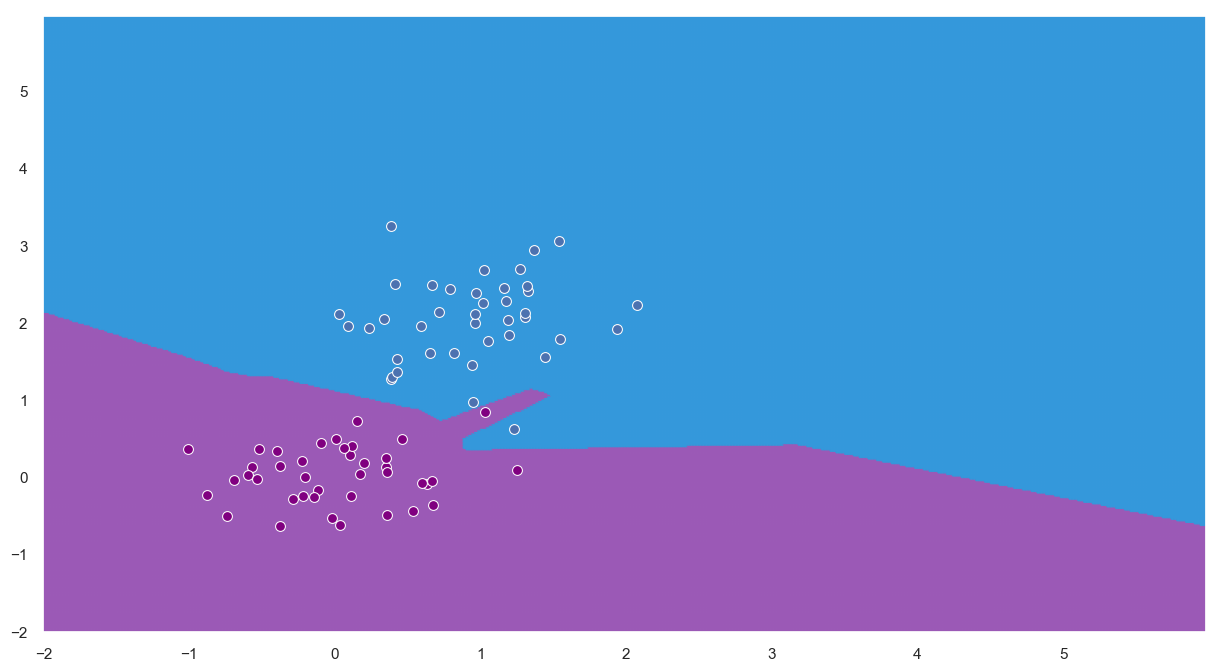

In [311]:
sns.set()
plt.figure(figsize = (15,8))
flatui = ["#9b59b6", "#3498db"]
my_cmap = ListedColormap(sns.color_palette(flatui).as_hex())
plt.pcolormesh(xx,yy,z ,cmap = my_cmap, alpha = .9, shading = 'flat', antialiased=True)
sns.scatterplot(x = X1, y = Y1, color = 'purple',s = 50)
sns.scatterplot(x = X2,y = Y2, s = 50)